#Covid Data Analysis Project

##Importing necessary python libraries for visualizations and analysis.

In [688]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
import matplotlib.pyplot as plt

##Mounting Google Drive

In [689]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Reading the dataset covid_19_india

In [690]:
covid_df= pd.read_excel("/content/covid_19_india.xlsx")

##Printing the first 10 rows of the dataset and their columns

In [691]:
covid_df.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,18:00:00,Kerala,1,0,0,0,1
1,2,2020-01-31,18:00:00,Kerala,1,0,0,0,1
2,3,2020-02-01,18:00:00,Kerala,2,0,0,0,2
3,4,2020-02-02,18:00:00,Kerala,3,0,0,0,3
4,5,2020-02-03,18:00:00,Kerala,3,0,0,0,3
5,6,2020-02-04,18:00:00,Kerala,3,0,0,0,3
6,7,2020-02-05,18:00:00,Kerala,3,0,0,0,3
7,8,2020-02-06,18:00:00,Kerala,3,0,0,0,3
8,9,2020-02-07,18:00:00,Kerala,3,0,0,0,3
9,10,2020-02-08,18:00:00,Kerala,3,0,0,0,3


##Presenting the basic information about the dataset, finding out the data type of each column and total entries in each column along with the total null values in the covid dataset

In [692]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       18110 non-null  int64         
 1   Date                      18110 non-null  datetime64[ns]
 2   Time                      18110 non-null  object        
 3   State/UnionTerritory      18110 non-null  object        
 4   ConfirmedIndianNational   18110 non-null  object        
 5   ConfirmedForeignNational  18110 non-null  object        
 6   Cured                     18110 non-null  int64         
 7   Deaths                    18110 non-null  int64         
 8   Confirmed                 18110 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.2+ MB


##Showing a concise summary of the covid dataset

In [693]:
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


##Presenting the unique values in each column

In [694]:
covid_df.nunique()

Sno                         18110
Date                          560
Time                            7
State/UnionTerritory           46
ConfirmedIndianNational        62
ConfirmedForeignNational       12
Cured                       14445
Deaths                       6471
Confirmed                   14971
dtype: int64

##Checking for null values

In [695]:
null_values = covid_df.isnull()
null_count_per_column = covid_df.isnull().sum()
total_null_count = covid_df.isnull().sum().sum()
print("Null values in the DataFrame:")
print(null_values)
print("\nNull count per column:")
print(null_count_per_column)
print("\nTotal number of null values in the DataFrame:", total_null_count)

Null values in the DataFrame:
         Sno   Date   Time  State/UnionTerritory  ConfirmedIndianNational  \
0      False  False  False                 False                    False   
1      False  False  False                 False                    False   
2      False  False  False                 False                    False   
3      False  False  False                 False                    False   
4      False  False  False                 False                    False   
...      ...    ...    ...                   ...                      ...   
18105  False  False  False                 False                    False   
18106  False  False  False                 False                    False   
18107  False  False  False                 False                    False   
18108  False  False  False                 False                    False   
18109  False  False  False                 False                    False   

       ConfirmedForeignNational  Cured  Death

##Dropping the useless columns from the covid dataset

In [696]:
covid_df.drop(["Sno", "Time", "ConfirmedIndianNational", "ConfirmedForeignNational"], inplace= True, axis=1)

In [697]:
covid_df.head(10)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
5,2020-02-04,Kerala,0,0,3
6,2020-02-05,Kerala,0,0,3
7,2020-02-06,Kerala,0,0,3
8,2020-02-07,Kerala,0,0,3
9,2020-02-08,Kerala,0,0,3


In [698]:
print(covid_df['State/UnionTerritory'].unique())

['Kerala' 'Telengana' 'Delhi' 'Rajasthan' 'Uttar Pradesh' 'Haryana'
 'Ladakh' 'Tamil Nadu' 'Karnataka' 'Maharashtra' 'Punjab'
 'Jammu and Kashmir' 'Andhra Pradesh' 'Uttarakhand' 'Odisha' 'Puducherry'
 'West Bengal' 'Chhattisgarh' 'Chandigarh' 'Gujarat' 'Himachal Pradesh'
 'Madhya Pradesh' 'Bihar' 'Manipur' 'Mizoram'
 'Andaman and Nicobar Islands' 'Goa' 'Unassigned' 'Assam' 'Jharkhand'
 'Arunachal Pradesh' 'Tripura' 'Nagaland' 'Meghalaya'
 'Dadra and Nagar Haveli and Daman and Diu'
 'Cases being reassigned to states' 'Sikkim' 'Daman & Diu' 'Lakshadweep'
 'Telangana' 'Dadra and Nagar Haveli' 'Bihar****' 'Madhya Pradesh***'
 'Himanchal Pradesh' 'Karanataka' 'Maharashtra***']


##Replacing the state and union territory names which consist of either a spelling mistake or present twice in the State/UnionTerritory column of the covid dataset

In [699]:
covid_df['State/UnionTerritory'] = covid_df['State/UnionTerritory'].replace({
    'Maharashtra***': 'Maharashtra',
    'Karanataka': 'Karnataka',
    'Madhya Pradesh***' : 'Madhya Pradesh',
    'Bihar****': 'Bihar', 'Telengana':'Telangana'})

Changing the format of the Date column

In [700]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'], format='%Y-%m-%d')

In [701]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


##Finding out the Active Covid cases

In [702]:
covid_df['Active_Cases'] = covid_df['Confirmed'] - (covid_df['Cured'] + covid_df['Deaths'])

##Printing the tail of the dataset(last 10 rows)

In [703]:
covid_df.tail(10)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_Cases
18100,2021-08-11,Puducherry,119115,1800,121766,851
18101,2021-08-11,Punjab,582791,16322,599573,460
18102,2021-08-11,Rajasthan,944700,8954,953851,197
18103,2021-08-11,Sikkim,25095,356,28018,2567
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130,20363
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-08-11,West Bengal,1506532,18252,1534999,10215


##Creating a pivot table for the covid dataset

In [704]:
statewise = pd.pivot_table(covid_df, values= ["Confirmed", "Deaths", "Cured"], index="State/UnionTerritory", aggfunc= max)

In [705]:
statewise["Recovery Rate"] = statewise["Cured"]*100/statewise["Confirmed"]

In [706]:
statewise["Mortality Rate"] = statewise["Deaths"]*100/statewise["Confirmed"]

In [707]:
statewise=statewise.sort_values(by="Confirmed", ascending=False)

In [708]:
statewise.style.background_gradient(cmap="cubehelix")

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056
Delhi,1436852,1411280,25068,98.220276,1.744647
Chhattisgarh,1003356,988189,13544,98.488373,1.349870


##Graph presenting the top 10 states with most active covid cases

<function matplotlib.pyplot.show(close=None, block=None)>

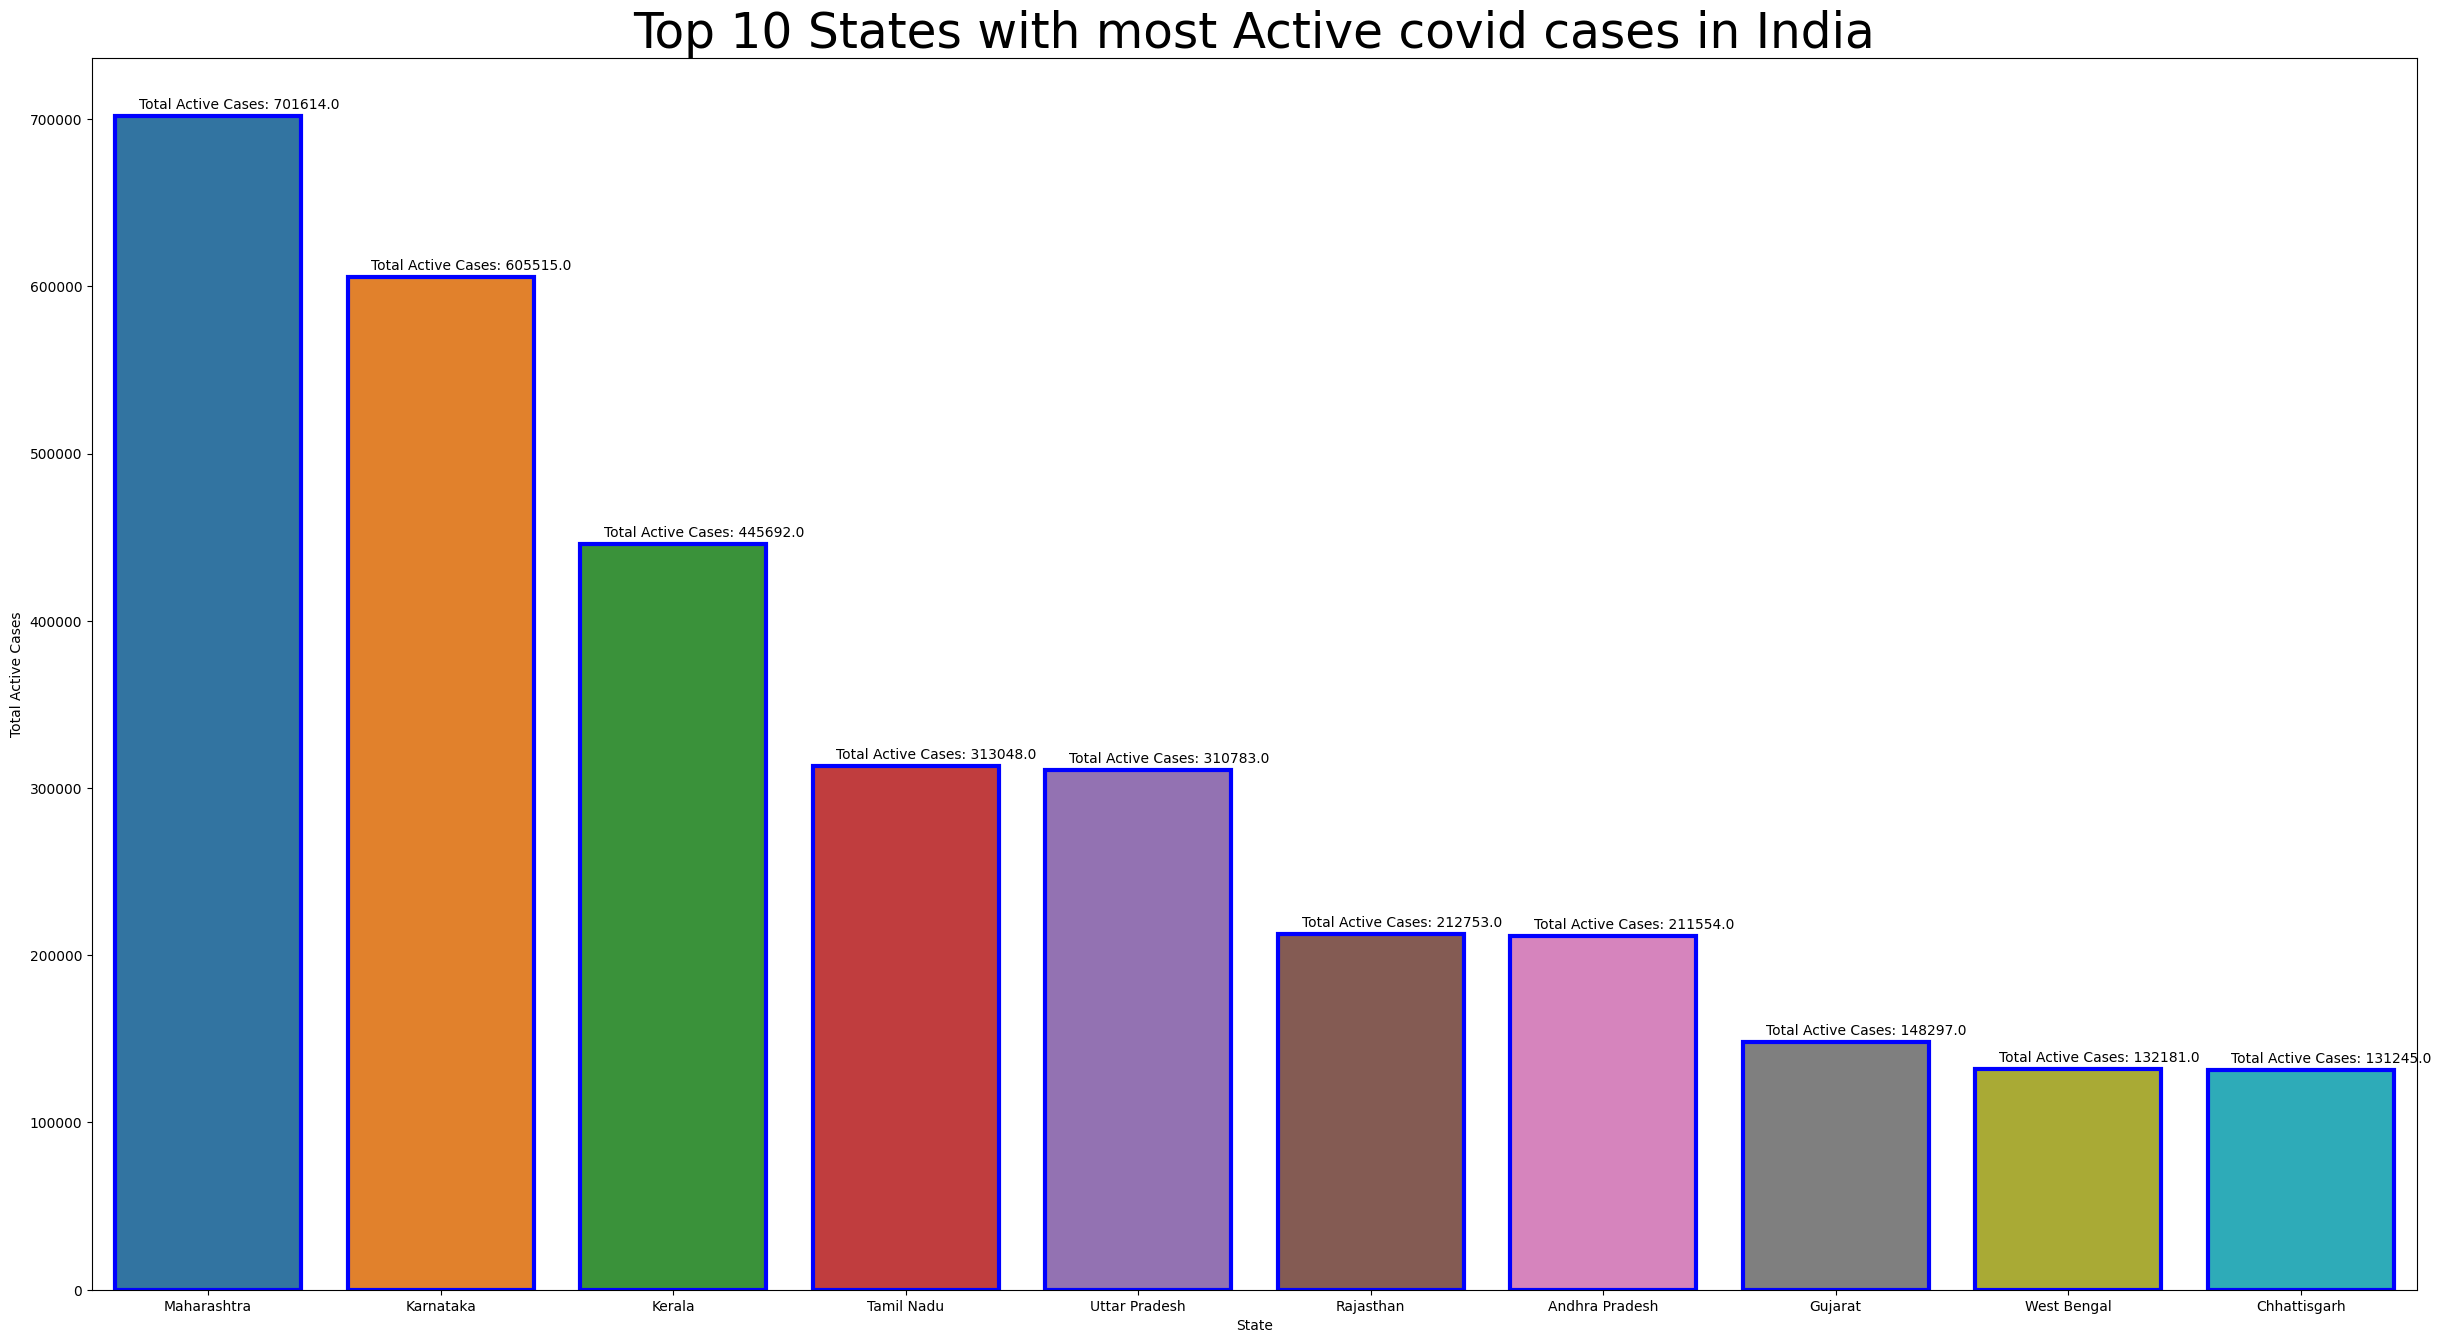

In [709]:
top_10_active_cases =covid_df.groupby(by='State/UnionTerritory').max()[['Active_Cases', 'Date']].sort_values(by=['Active_Cases'], ascending=False).reset_index()
fig= plt.figure(figsize=(30,16))
plt.title("Top 10 States with most Active covid cases in India", size=35)
ax= sns.barplot(data=top_10_active_cases.iloc[:10], y="Active_Cases", x="State/UnionTerritory", linewidth=3, edgecolor='blue')
plt.xlabel("State")
plt.ylabel("Total Active Cases")
for bar in ax.patches:
    ax.annotate(f"Total Active Cases: {bar.get_height()}",
                xy=(bar.get_x() + bar.get_width() / 1.5, bar.get_height()),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
plt.show

##Graph presenting the top 10 states with most deaths

In [710]:
top_10_deaths=covid_df.groupby(by='State/UnionTerritory').max()[['Deaths', 'Date']].sort_values(by=['Deaths'], ascending=False).reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

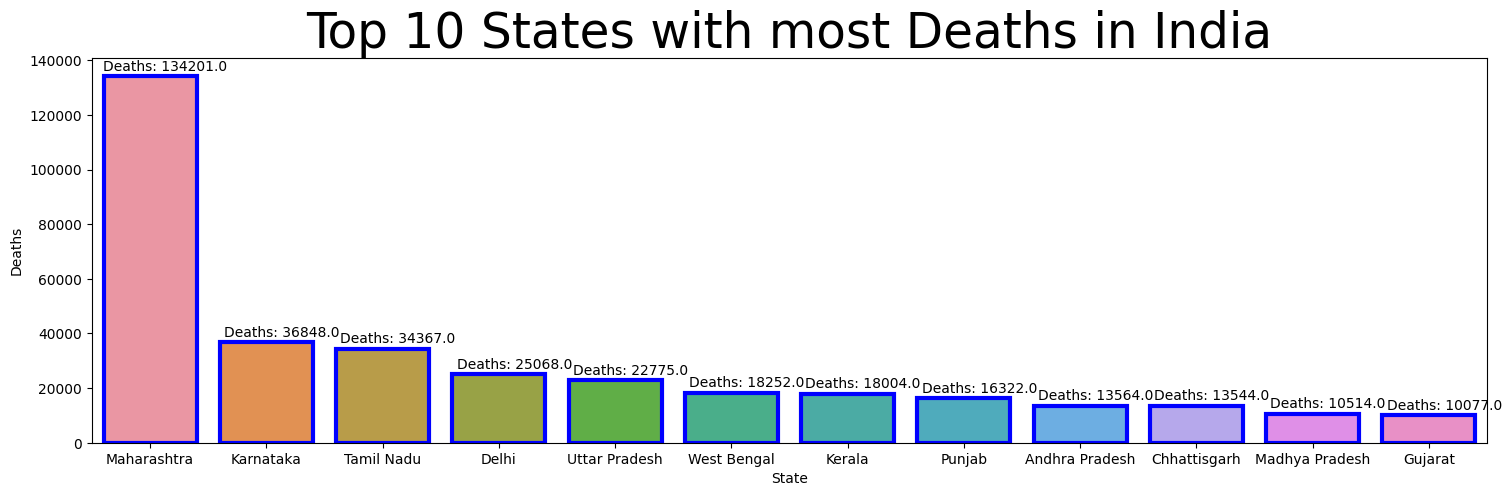

In [711]:
top_10_deaths =covid_df.groupby(by='State/UnionTerritory').max()[['Deaths', 'Date']].sort_values(by=['Deaths'], ascending=False).reset_index()
fig= plt.figure(figsize=(18,5))
plt.title("Top 10 States with most Deaths in India", size=35)
ax= sns.barplot(data=top_10_deaths.iloc[:12], y="Deaths", x="State/UnionTerritory", linewidth=3, edgecolor='blue')
plt.xlabel("State")
plt.ylabel("Deaths")
for bar in ax.patches:
    ax.annotate(f"Deaths: {bar.get_height()}",
                xy=(bar.get_x() + bar.get_width() / 1.5, bar.get_height()),
                xytext=(0, 2),
                textcoords="offset points",
                ha='center', va='bottom')
plt.show

##Line plot representing the top 5 states affcted due to covid

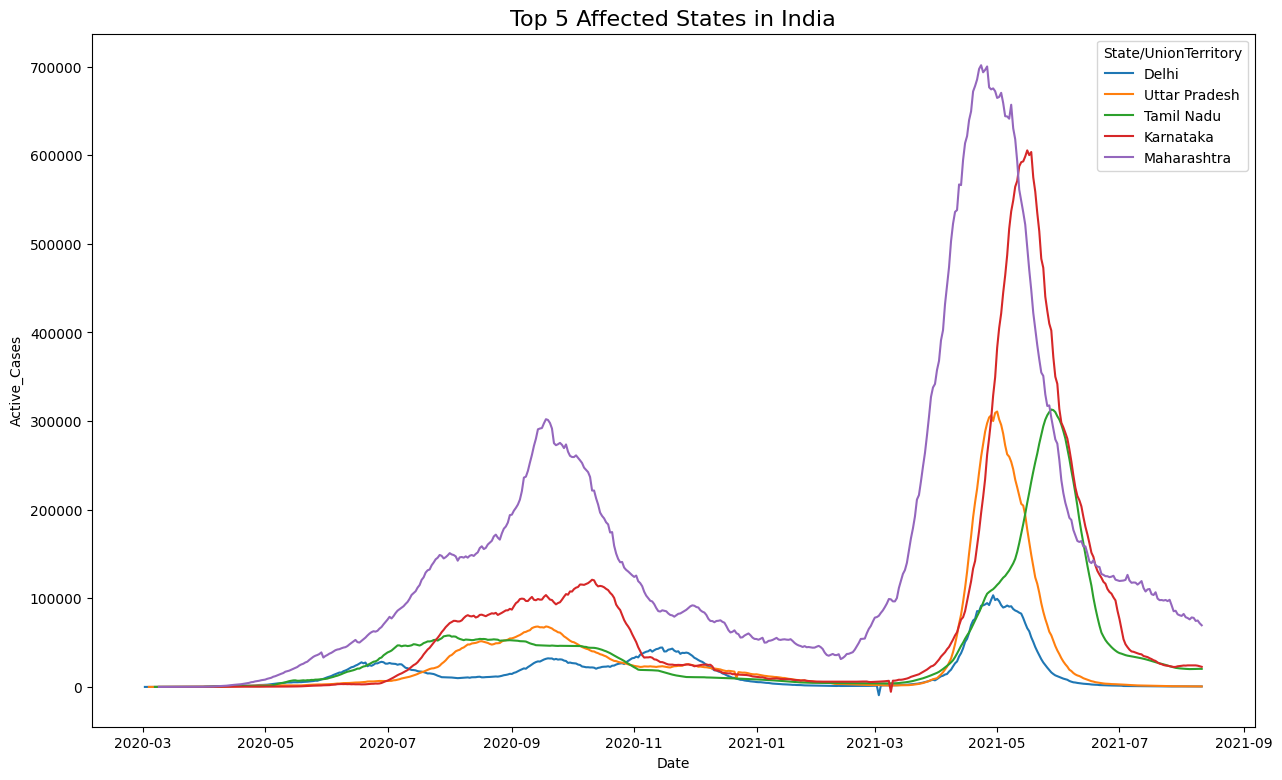

In [712]:
fig = plt.figure(figsize=(15, 9))
ax = sns.lineplot(data=covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra', 'Karnataka', 'Tamil Nadu', 'Delhi', 'Uttar Pradesh'])], x='Date', y='Active_Cases', hue='State/UnionTerritory')
ax.set_title("Top 5 Affected States in India", size=16)

plt.show()

In [713]:
covid_df = covid_df.drop_duplicates()


##Reading the covid_vaccine_statewise dataset

In [714]:
vaccine_df=pd.read_excel("/content/covid_vaccine_statewise.xlsx")

##Printing the first 10 rows of the dataset and their columns

In [715]:
vaccine_df.head(10)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,2021-01-16,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,2021-01-17,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,2021-01-18,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,2021-01-19,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,2021-01-20,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
5,2021-01-21,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,365965.0
6,2021-01-22,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,549381.0
7,2021-01-23,India,759008.0,43076.0,15605.0,759008.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,267856.0,491049.0,103.0,759008.0
8,2021-01-24,India,835058.0,49851.0,18111.0,835058.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,296283.0,538647.0,128.0,835058.0
9,2021-01-25,India,1277104.0,55151.0,19682.0,1277104.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,444137.0,832766.0,201.0,1277104.0


##Presenting the basic information about the dataset, finding out the data type of each column and total entries in each column along with the total null values in the covid dataset

In [716]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Updated On                           7845 non-null   datetime64[ns]
 1   State                                7845 non-null   object        
 2   Total Doses Administered             7621 non-null   float64       
 3   Sessions                             7621 non-null   float64       
 4    Sites                               7621 non-null   float64       
 5   First Dose Administered              7621 non-null   float64       
 6   Second Dose Administered             7621 non-null   float64       
 7   Male (Doses Administered)            7461 non-null   float64       
 8   Female (Doses Administered)          7461 non-null   float64       
 9   Transgender (Doses Administered)     7461 non-null   float64       
 10   Covaxin (Do

##Showing a concise summary of the covid dataset

In [717]:
vaccine_df.describe()

,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
count,7.621000e+03,7.621000e+03,7621.000000,7.621000e+03,7.621000e+03,7.461000e+03,7.461000e+03,7461.000000,7.621000e+03,7.621000e+03,...,1.702000e+03,1.702000e+03,1.702000e+03,3.733000e+03,3.734000e+03,3.734000e+03,1.600000e+02,1.600000e+02,160.000000,5.919000e+03
mean,9.188171e+06,4.792358e+05,2282.872064,7.414415e+06,1.773755e+06,3.620156e+06,3.168416e+06,1162.978019,1.044669e+06,8.126553e+06,...,8.773958e+06,7.442161e+06,5.641605e+06,1.395895e+06,2.916515e+06,2.627444e+06,4.461687e+07,3.951018e+07,12370.543750,4.547842e+06
std,3.746180e+07,1.911511e+06,7275.973730,2.995209e+07,7.570382e+06,1.737938e+07,1.515310e+07,5931.353995,4.452259e+06,3.298414e+07,...,2.660829e+07,2.225999e+07,1.681650e+07,5.501454e+06,9.567607e+06,8.192225e+06,3.950749e+07,3.417684e+07,12485.026753,1.834182e+07
min,7.000000e+00,0.000000e+00,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,7.000000e+00,...,2.662400e+04,1.681500e+04,9.994000e+03,1.059000e+03,1.136000e+03,5.580000e+02,2.375700e+04,2.451700e+04,2.000000,7.000000e+00
25%,1.356570e+05,6.004000e+03,69.000000,1.166320e+05,1.283100e+04,5.655500e+04,5.210700e+04,8.000000,0.000000e+00,1.331340e+05,...,4.344842e+05,2.326275e+05,1.285605e+05,5.655400e+04,9.248225e+04,5.615975e+04,5.739350e+06,5.023407e+06,1278.750000,7.427550e+04
50%,8.182020e+05,4.547000e+04,597.000000,6.614590e+05,1.388180e+05,3.897850e+05,3.342380e+05,113.000000,1.185100e+04,7.567360e+05,...,3.095970e+06,2.695938e+06,1.805696e+06,2.947270e+05,8.330395e+05,7.887425e+05,3.716590e+07,3.365402e+07,8007.500000,4.022880e+05
75%,6.625243e+06,3.428690e+05,1708.000000,5.387805e+06,1.166434e+06,2.735777e+06,2.561513e+06,800.000000,7.579300e+05,6.007817e+06,...,7.366241e+06,6.969726e+06,5.294763e+06,9.105160e+05,2.499280e+06,2.337874e+06,7.441663e+07,6.685368e+07,19851.000000,3.501562e+06
max,5.132284e+08,3.501031e+07,73933.000000,4.001504e+08,1.130780e+08,2.701636e+08,2.395186e+08,98275.000000,6.236742e+07,4.468251e+08,...,2.243304e+08,1.667575e+08,1.186927e+08,9.224315e+07,9.096888e+07,6.731098e+07,1.349420e+08,1.156684e+08,46462.000000,2.506569e+08


##Presenting the unique values in each column

In [718]:
vaccine_df.nunique()

Updated On                              213
State                                    37
Total Doses Administered               7376
Sessions                               6464
 Sites                                 3044
First Dose Administered                7367
Second Dose Administered               6275
Male (Doses Administered)              7170
Female (Doses Administered)            7155
Transgender (Doses Administered)       2117
 Covaxin (Doses Administered)          4353
CoviShield (Doses Administered)        7375
Sputnik V (Doses Administered)         1040
AEFI                                   1548
18-44 Years (Doses Administered)       1694
45-60 Years (Doses Administered)       1693
60+ Years (Doses Administered)         1692
18-44 Years(Individuals Vaccinated)    3696
45-60 Years(Individuals Vaccinated)    3700
60+ Years(Individuals Vaccinated)      3684
Male(Individuals Vaccinated)            159
Female(Individuals Vaccinated)          159
Transgender(Individuals Vaccinat

##Checking for null values

In [719]:
null_values = vaccine_df.isnull()
null_count_per_column = vaccine_df.isnull().sum()
total_null_count = vaccine_df.isnull().sum().sum()
print("Null values in the DataFrame:")
print(null_values)
print("\nNull count per column:")
print(null_count_per_column)
print("\nTotal number of null values in the DataFrame:", total_null_count)

Null values in the DataFrame:
      Updated On  State  Total Doses Administered  Sessions   Sites   \
0          False  False                     False     False    False   
1          False  False                     False     False    False   
2          False  False                     False     False    False   
3          False  False                     False     False    False   
4          False  False                     False     False    False   
...          ...    ...                       ...       ...      ...   
7840       False  False                      True      True     True   
7841       False  False                      True      True     True   
7842       False  False                      True      True     True   
7843       False  False                      True      True     True   
7844       False  False                      True      True     True   

      First Dose Administered  Second Dose Administered  \
0                       False                 

##Dropping the columns that contain a lot of null values

In [720]:
vaccination = [
    'Sputnik V (Doses Administered)',
    'AEFI',
    '18-44 Years (Doses Administered)',
    '45-60 Years (Doses Administered)',
    '60+ Years (Doses Administered)',
    '18-44 Years(Individuals Vaccinated)',
    '45-60 Years(Individuals Vaccinated)',
    '60+ Years(Individuals Vaccinated)',
    'Male(Individuals Vaccinated)',
    'Female(Individuals Vaccinated)',
    'Transgender(Individuals Vaccinated)',
    'Total Individuals Vaccinated'
]
vaccine_df.drop(columns=vaccination, inplace=True)

##Printing the head of the dataset once again

In [721]:
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered)
0,2021-01-16,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0
1,2021-01-17,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0
2,2021-01-18,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0
3,2021-01-19,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0
4,2021-01-20,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0


##Tail of the vaccine Dataset(presenting the last 10 rows of the dataset)

In [722]:
vaccine_df.tail()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered)
7840,2021-08-11,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,2021-08-12,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,2021-08-13,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,2021-08-14,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7844,2021-08-15,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Presenting the basic information about the dataset, finding out the data type of each column and total entries in each column along with the total null values in the covid dataset

In [723]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Updated On                        7845 non-null   datetime64[ns]
 1   State                             7845 non-null   object        
 2   Total Doses Administered          7621 non-null   float64       
 3   Sessions                          7621 non-null   float64       
 4    Sites                            7621 non-null   float64       
 5   First Dose Administered           7621 non-null   float64       
 6   Second Dose Administered          7621 non-null   float64       
 7   Male (Doses Administered)         7461 non-null   float64       
 8   Female (Doses Administered)       7461 non-null   float64       
 9   Transgender (Doses Administered)  7461 non-null   float64       
 10   Covaxin (Doses Administered)     7621 non-null 

##Changing the column name "Updated On" to 'Vaccine_Date'

In [724]:
vaccine_df.rename(columns={'Updated On':"Vaccine_Date"}, inplace=True)

In [725]:
vaccine_df.head(10)

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered)
0,2021-01-16,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0
1,2021-01-17,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0
2,2021-01-18,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0
3,2021-01-19,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0
4,2021-01-20,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0
5,2021-01-21,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,5367.0,360598.0
6,2021-01-22,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,8128.0,541253.0
7,2021-01-23,India,759008.0,43076.0,15605.0,759008.0,0.0,NaN,NaN,NaN,11192.0,747816.0
8,2021-01-24,India,835058.0,49851.0,18111.0,835058.0,0.0,NaN,NaN,NaN,13156.0,821902.0
9,2021-01-25,India,1277104.0,55151.0,19682.0,1277104.0,0.0,NaN,NaN,NaN,18858.0,1258246.0


##Creating a pie chart which consists of information about distribution of vaccinations by gender, i.e what percentage of male population received vaccinations and what percentage of female poulation

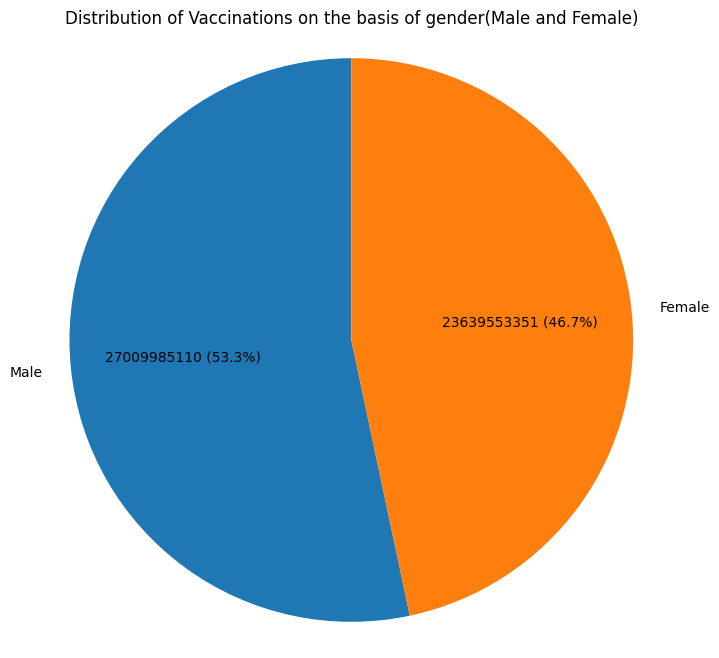

In [726]:
male_vaccinations = vaccine_df["Male (Doses Administered)"].sum()
female_vaccinations = vaccine_df["Female (Doses Administered)"].sum()
gender_labels = ['Male', 'Female']
vaccinations = [male_vaccinations, female_vaccinations]
plt.figure(figsize=(8, 8))
plt.pie(vaccinations, labels=gender_labels, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(vaccinations) / 100, p),
        startangle=90)
plt.axis('equal')
plt.title('Distribution of Vaccinations on the basis of gender(Male and Female)')
plt.show()

Removing rows where state = "India"

In [727]:
vaccine=vaccine_df[vaccine_df.State!='India']
vaccine

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered)
212,2021-01-16,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0
213,2021-01-17,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0
214,2021-01-18,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0
215,2021-01-19,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0
216,2021-01-20,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7840,2021-08-11,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,2021-08-12,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,2021-08-13,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,2021-08-14,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [728]:
vaccine.rename(columns={"Total Doses Administered":"Total"}, inplace=True)
vaccine.head()

<ipython-input-728-9c46d06580b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine.rename(columns={"Total Doses Administered":"Total"}, inplace=True)


,Vaccine_Date,State,Total,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered)
212,2021-01-16,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0
213,2021-01-17,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0
214,2021-01-18,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0
215,2021-01-19,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0
216,2021-01-20,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0


##Most Vaccination Doses States

In [729]:
max_vac = vaccine.groupby('State')['Total'].sum().to_frame('Total')
max_vac = max_vac.sort_values('Total', ascending=False).head(10)
print("Top 10 states with the maximum vaccinations doses administered:")
print(max_vac)

Top 10 states with the maximum vaccinations doses administered:
                       Total
State                       
Maharashtra     3.497245e+09
Uttar Pradesh   3.342846e+09
Gujarat         2.732064e+09
Rajasthan       2.692747e+09
West Bengal     2.382597e+09
Karnataka       2.300517e+09
Madhya Pradesh  2.113538e+09
Bihar           1.741293e+09
Andhra Pradesh  1.591678e+09
Tamil Nadu      1.579203e+09


##Barplot depicting the top 10 states with the most number of vaccination doses administered

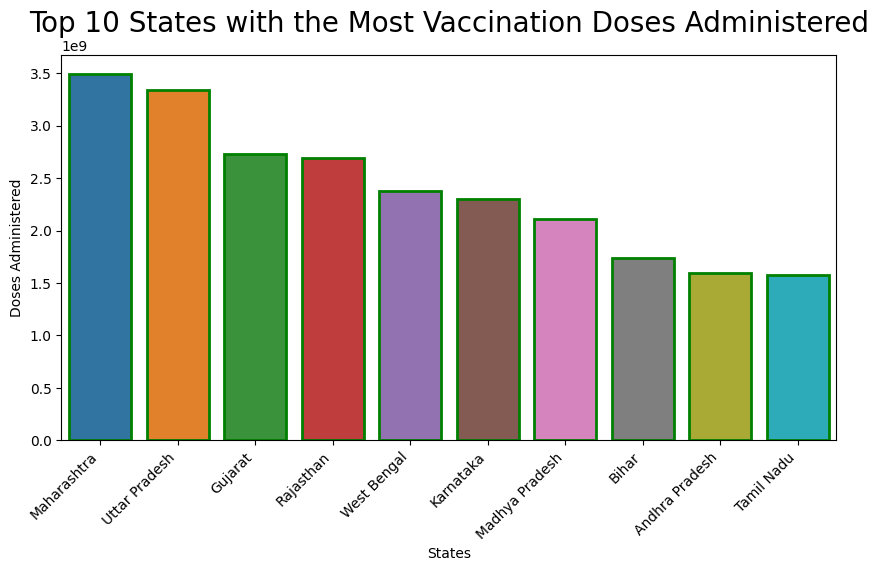

In [730]:
max_vac = vaccine.groupby('State')['Total'].sum().to_frame('Total')
max_vac = max_vac.sort_values('Total', ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.title("Top 10 States with the Most Vaccination Doses Administered", size=20)
sns.barplot(data=max_vac, x=max_vac.index, y='Total', linewidth=2, edgecolor='green')
plt.xlabel("States")
plt.ylabel("Doses Administered")
for bar in ax.patches:
    ax.annotate(f"{bar.get_height():.0f}",
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 2),
                textcoords="offset points",
                ha='center', va='bottom')
plt.xticks(rotation=45, ha='right')
plt.show()

##Least Vaccination Doses States

In [731]:
min_vac = vaccine.groupby('State')['Total'].sum().to_frame('Total')
min_vac = min_vac.sort_values('Total', ascending=True).head(10)
print("10 states with the least vaccinations doses administered:")
print(min_vac)

10 states with the least vaccinations doses administered:
                                               Total
State                                               
Lakshadweep                                5420101.0
Andaman and Nicobar Islands               20544408.0
Ladakh                                    23263011.0
Dadra and Nagar Haveli and Daman and Diu  38189479.0
Sikkim                                    46704569.0
Puducherry                                49955717.0
Nagaland                                  51615403.0
Chandigarh                                56296840.0
Mizoram                                   57871495.0
Arunachal Pradesh                         60937297.0


##Barplot depicting the 10 states with the least number of vaccination doses administered

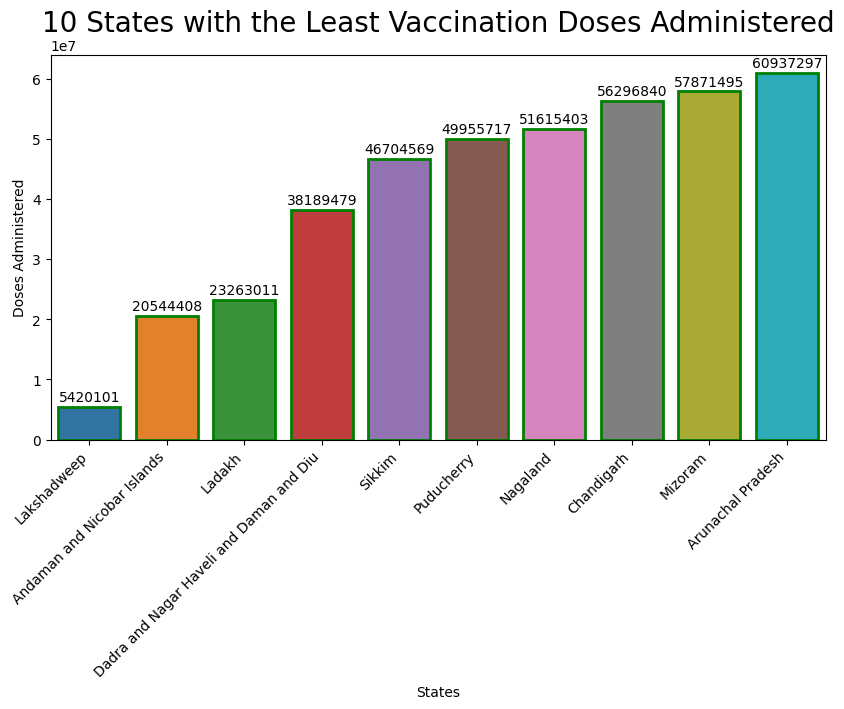

In [732]:
min_vac = vaccine.groupby('State')['Total'].sum().to_frame('Total')
min_vac = min_vac.sort_values('Total', ascending=True).head(10)
plt.figure(figsize=(10, 5))
plt.title("10 States with the Least Vaccination Doses Administered", size=20)
ax = sns.barplot(data=min_vac, x=min_vac.index, y='Total', linewidth=2, edgecolor='green')
plt.xlabel("States")
plt.ylabel("Doses Administered")
for bar in ax.patches:
    ax.annotate(f"{bar.get_height():.0f}",
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 2),
                textcoords="offset points",
                ha='center', va='bottom')
plt.xticks(rotation=45, ha='right')
plt.show()